In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1. Скачать данные

In [39]:
df = pd.read_csv('D:\Катя\GeekBrains\! 20. Основы языка Python для аналитиков\Семинар 4 Визуальный анализ данных/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

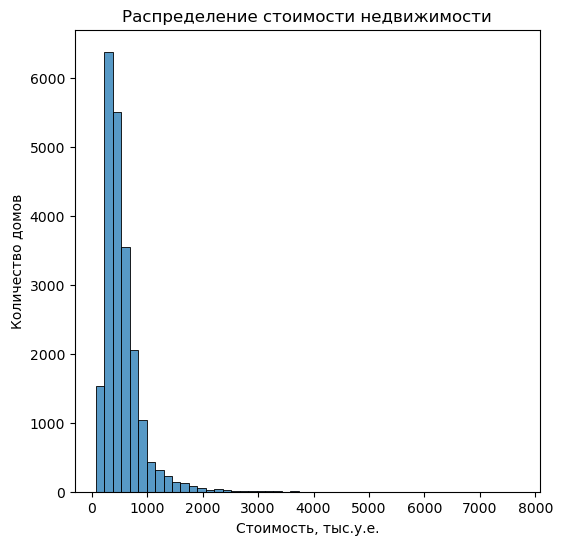

In [14]:
plt.figure(figsize=(6, 6))

sns.histplot(df['price']/1000, bins=50)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость, тыс.у.е.')
plt.ylabel('Количество домов');

Основная часть домов имеет стоимость до 1 000 000 у.е.

### 1.3 Изучите распределение квадратуры жилой площади

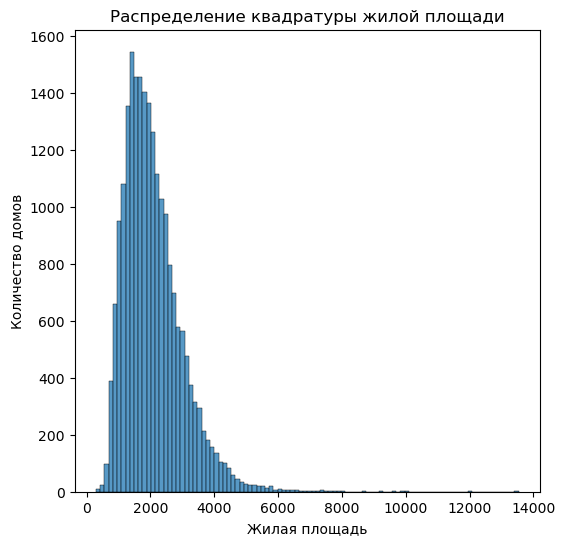

In [15]:
plt.figure(figsize=(6, 6))

sns.histplot(df['sqft_living'], bins=100)

plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

Большинство домов имеетжилую площадь приблизительно 1000 до 3000 кв.м

### 1.4 Изучите распределение года постройки

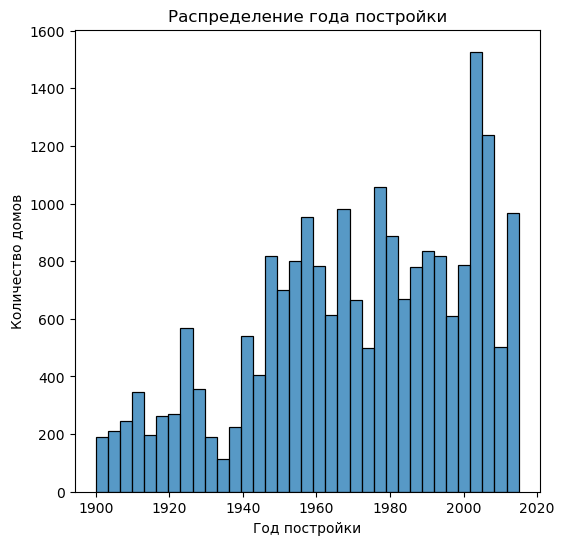

In [10]:
plt.figure(figsize=(6, 6))

sns.histplot(df['yr_built'])

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Большинство выставленных на продажу домов построены в период с 1950 по 2015 года. Больше всего домов построены в 2010-2015 г.г.

## Задача 2
Постройте график
Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

In [17]:
data1 = df['waterfront'].value_counts()
data1

0    21450
1      163
Name: waterfront, dtype: int64

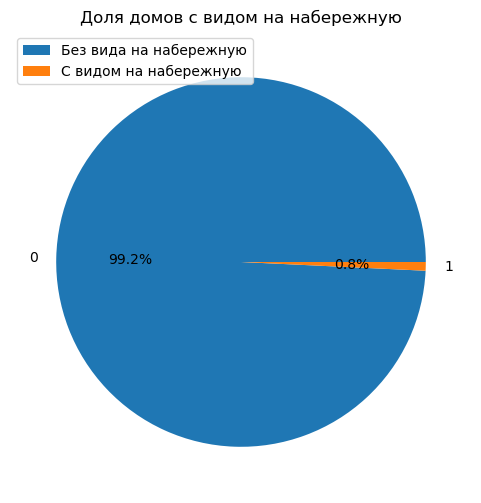

In [23]:
plt.figure(figsize=(6, 6))

plt.pie(data1, labels = data1.index, autopct='%.1f%%')

plt.title('Доля домов с видом на набережную')
plt.legend(['Без вида на набережную', 'С видом на набережную'], loc='upper left');

### 2.2 Изучите распределение этажей домов

In [24]:
data2 = df['floors'].value_counts().reset_index()
data2

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


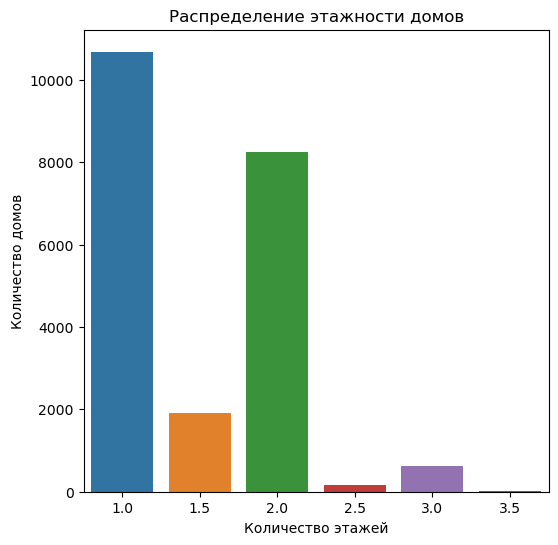

In [27]:
plt.figure(figsize=(6, 6))

sns.barplot(x=data2['index'], y=data2['floors'])

plt.title('Распределение этажности домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Наибольшее количество продаваемых домов одноэтажные. Чуть меньше продается двухэтажных домов. Следующими по количеству идут полутороэтажные дома, но все равно их количество значительно менньше, чем одно- и двухэтажных домов.

### 2.3 Изучите распределение состояния домов

In [28]:
data3= df['condition'].value_counts().reset_index()
data3.head()

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


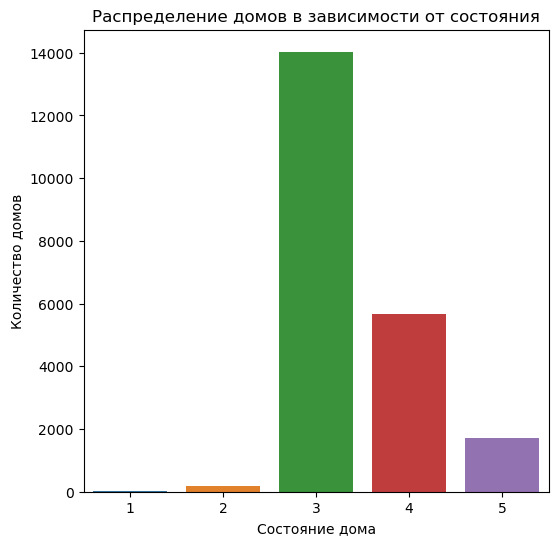

In [29]:
plt.figure(figsize=(6, 6))

sns.barplot(x=data3['index'], y=data3['condition'])

plt.title('Распределение домов в зависимости от состояния')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

Больше всего выставлено на продажу домов в удовлетворительном состоянии. Так же достаточно домов в хорошем состоянии, немного в отличном. Совсем мало домов в состоянии ниже удовлетворительного.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

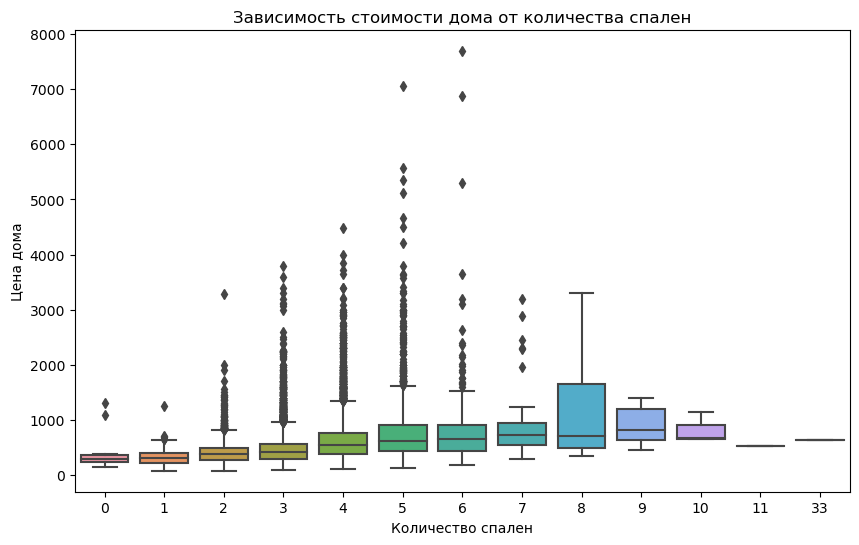

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bedrooms'], y=df['price']/1000)

plt.title('Зависимость стоимости дома от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена дома');

Наименьшую стоимость имеют дома без спален и с одной спальней, количество выбросов у данной категории домов минимально. Дома с количеством спален 8 имеют наиболее широкий ценовой диапазон, а так же достаточно высокую цену и при этом не имеют выбросов - это говорит о стабильно высокой цене на такие дома не зависимо от влияния других факторов. Цена на дома с количеством спален 2-6 идет по возрастанию и имеют наибольшее количество выбросов. Большое количество выбросов говорит о том, что существует еще ряд факторв, оказывающих значительное влияние на цену.

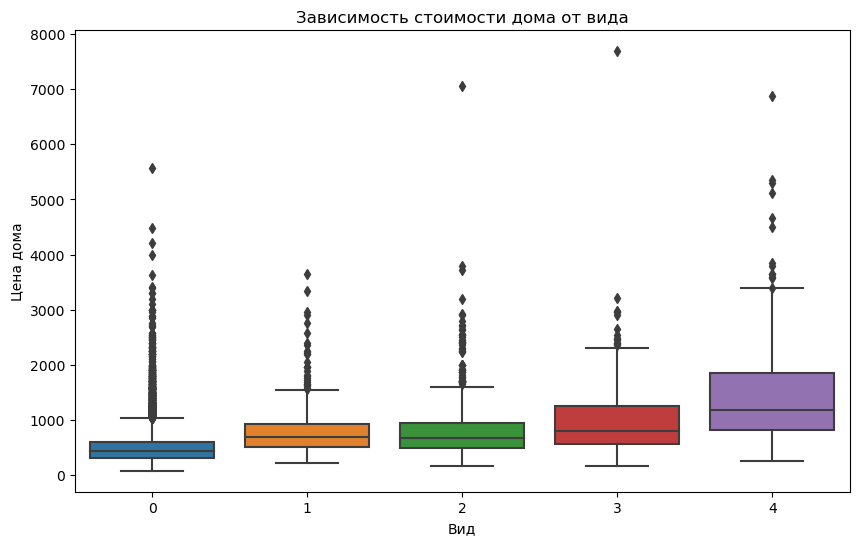

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['view'], y=df['price']/1000)

plt.title('Зависимость стоимости дома от вида')
plt.xlabel('Вид')
plt.ylabel('Цена дома');

Дома с самым плохим видом (0) имеют наименьшую цену, но при этом имеют максимальные выбросы, что в свою очередь, говорит о влиянии на цену других факторов (кол-во спален, координаты, площадь и т.п.). 
Дома с видом 2-3 имеют примерно одинаковый ценовой диапазон, в половину выше стоимости домов с плохим видом.
Дома с хорошим видом (3) имеют более широкий ценовой диапазон, и нижний предел цен таких домов равен нижнему пределу цен домов с видом 2 - 3.
Дома с самым хорошим видом (4) имеют самую высокую цену и наибольший разбег цен.
Дома с видом 2 и 3 имеют самые максимальные выбросы.

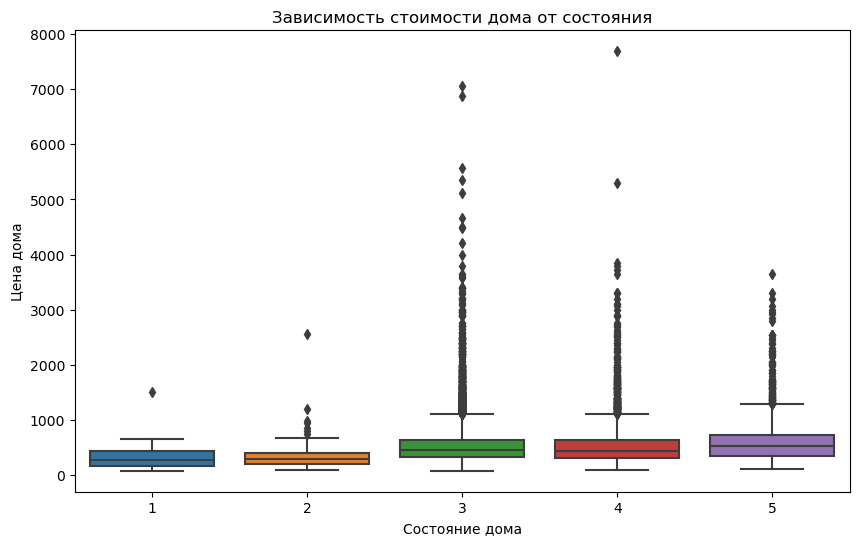

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['condition'], y=df['price']/1000)

plt.title('Зависимость стоимости дома от состояния')
plt.xlabel('Состояние дома')
plt.ylabel('Цена дома');

Средняя цена домов в плохоим состоянии (1-2) примерно одинакова и является самой низкой. Дома в удовлетворительном и хорошем состоянии имеют так же примерно одинаковую среднюю стоимость и диапазон цен. Но при этом дома в удовлетворительном состоянии имеют максимально широкий диапазон выбросов, что говорит о значительном влиянии на цену других факторов. Наиболее высокую среднюю цену имеют дома в отличном состоянии.

<Figure size 1000x600 with 0 Axes>

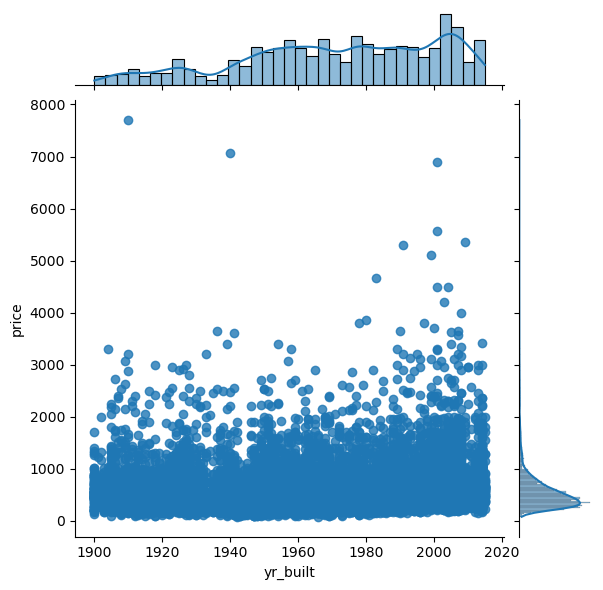

In [103]:
plt.figure(figsize=(10,6))

sns.jointplot(x=df['yr_built'], y=df['price']/1000, kind='reg');

На данном графике взаимного распределения нет явной линейной зависимости цены от года постройки дома.

<Figure size 1000x600 with 0 Axes>

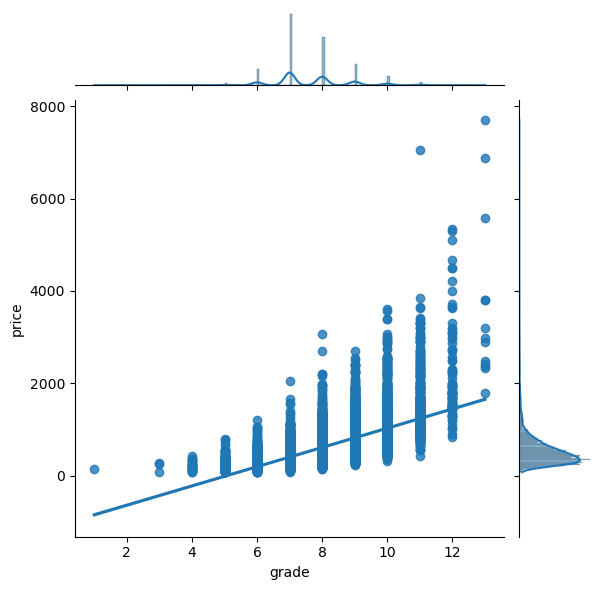

In [104]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['grade'], y=df['price']/1000, kind='reg');

Существует линейная зависимость между конструкцией дома и его стоимостью. При этом мы можем наблюдать, что нижний предел цен растет слабо до характеристики конструктива 10, далее более резко, и имеет большую плотность. Верхний предел напротив, имеет более резкий рост и меньшую плотность, а так же появляются четкие выбросы.